In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [37]:
df = pd.read_csv('Unemployment in India.csv',delimiter=' *, *')

# renaming column name
df = df.rename(columns={'ï»¿Region': 'Region'})

In [38]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [39]:
df.shape

(768, 7)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [41]:
# Check for missing values
print(df.isnull().sum())


Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64


In [42]:
df.fillna(df.median(), inplace=True)

In [43]:
# Check again for missing values
print(df.isnull().sum())

Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)             0
Estimated Employed                          0
Estimated Labour Participation Rate (%)     0
Area                                       28
dtype: int64


In [44]:
df.fillna(df.mode(), inplace=True)

In [45]:
# Check again for missing values
print(df.isnull().sum())

Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)             0
Estimated Employed                          0
Estimated Labour Participation Rate (%)     0
Area                                       28
dtype: int64


In [46]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

#### Distribution of Unemployment Rate:

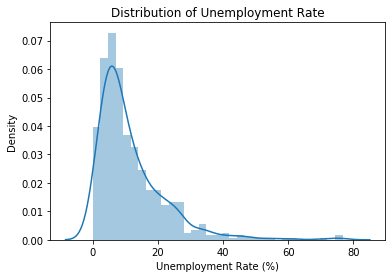

In [47]:
sns.distplot(df['Estimated Unemployment Rate (%)'])
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Density')
plt.title('Distribution of Unemployment Rate')
plt.show()


#### Unemployment Rate by Region:

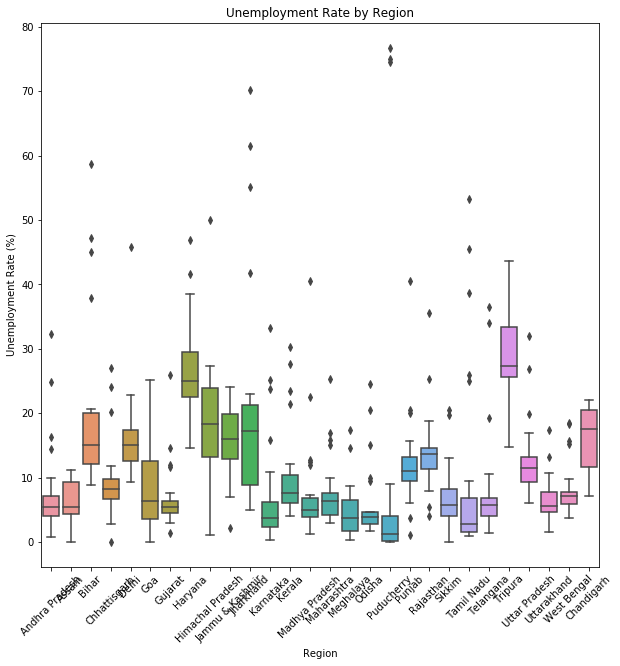

In [59]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Region', y='Estimated Unemployment Rate (%)', data=df,)
plt.xticks(rotation=45)  # Rotate region labels for better readability
plt.xlabel('Region')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate by Region')
plt.show()



#### Time Series Analysis (if 'Date' is a datetime format):



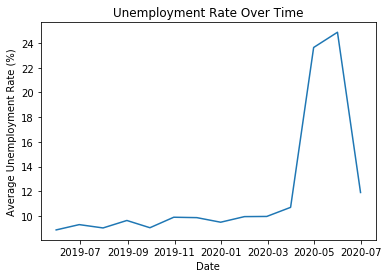

In [49]:
# Convert 'Date' to datetime 
df['Date'] = pd.to_datetime(df['Date'])

# Group by date and calculate average unemployment rate 
unemployment_by_date = df.groupby('Date')['Estimated Unemployment Rate (%)'].mean()

plt.plot(unemployment_by_date.index, unemployment_by_date.values)
plt.xlabel('Date')
plt.ylabel('Average Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time')
plt.show()

#### Relationship between Unemployment Rate and Other Variables:

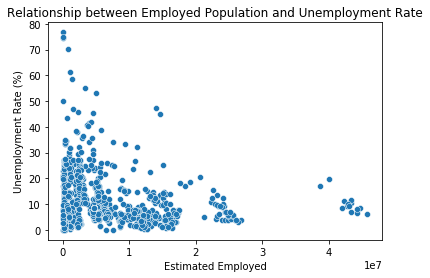

In [55]:
sns.scatterplot(x='Estimated Employed', y='Estimated Unemployment Rate (%)', data=df)
plt.xlabel('Estimated Employed')
plt.ylabel('Unemployment Rate (%)')
plt.title('Relationship between Employed Population and Unemployment Rate')
plt.show()

# Create similar scatterplots for other relevant relationships


#### Unemployment Rate by Area (Rural vs. Urban):

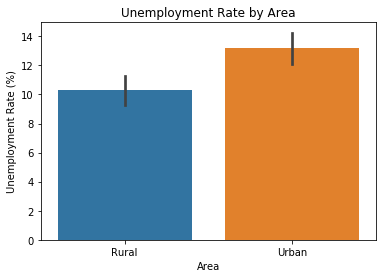

In [56]:
sns.barplot(x='Area', y='Estimated Unemployment Rate (%)', data=df)
plt.xlabel('Area')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate by Area')
plt.show()


#### top 5 states with highest unemploymnt

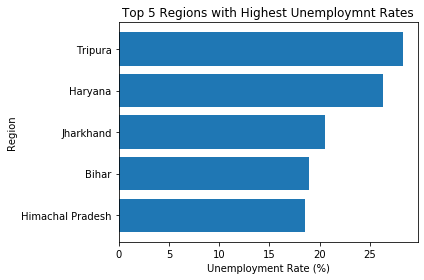

In [61]:
top_5_unemployment = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False).head(5)
plt.barh(top_5_unemployment.index, top_5_unemployment.values)
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Region')
plt.title('Top 5 Regions with Highest Unemploymnt Rates')
plt.gca().invert_yaxis()  # Arrange bars with highest rate at the top
plt.tight_layout()
plt.show()


In [66]:
#### Distribution of Unemployed People by Area

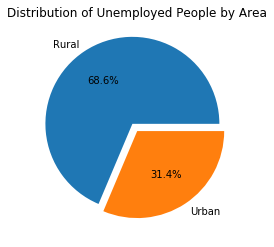

In [67]:
rural_unemployed = df[df['Area'] == 'Rural']['Estimated Employed'].sum()
urban_unemployed = df[df['Area'] == 'Urban']['Estimated Employed'].sum()

labels = 'Rural', 'Urban'
sizes = [rural_unemployed, urban_unemployed]
plt.pie(sizes, explode=(0.1, 0), labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Unemployed People by Area')
plt.show()
